In [1]:
from typing import List

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None


In [2]:
dataset_path = 'hdfs://hadoop:9000/user/daniel/dataset/dataset.parquet'
sales_df = pd.read_parquet(dataset_path)


/home/daniel/.conda/envs/demand_forecast/lib/python3.8/site-packages/fsspec/implementations/hdfs.py:49: FutureWarning: pyarrow.hdfs.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  pahdfs = HadoopFileSystem(
find: ‘/opt/hadoop/dfs/data’: Permissão negada
2021-08-11 14:42:17,730 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100506 entries, 0 to 100505
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   y                           100506 non-null  int32  
 1   m                           100506 non-null  int32  
 2   date                        100506 non-null  object 
 3   seller_id                   100506 non-null  object 
 4   customer_id                 100506 non-null  object 
 5   product_id                  100506 non-null  object 
 6   order_id                    100506 non-null  object 
 7   order_status                100506 non-null  object 
 8   days_to_approve             100506 non-null  int32  
 9   days_to_post                100506 non-null  int32  
 10  days_to_deliver             100506 non-null  int32  
 11  days_estimated_to_deliver   100506 non-null  int32  
 12  estimated_delivered_diff    100506 non-null  int32  
 13  is_delayed    

<AxesSubplot:>

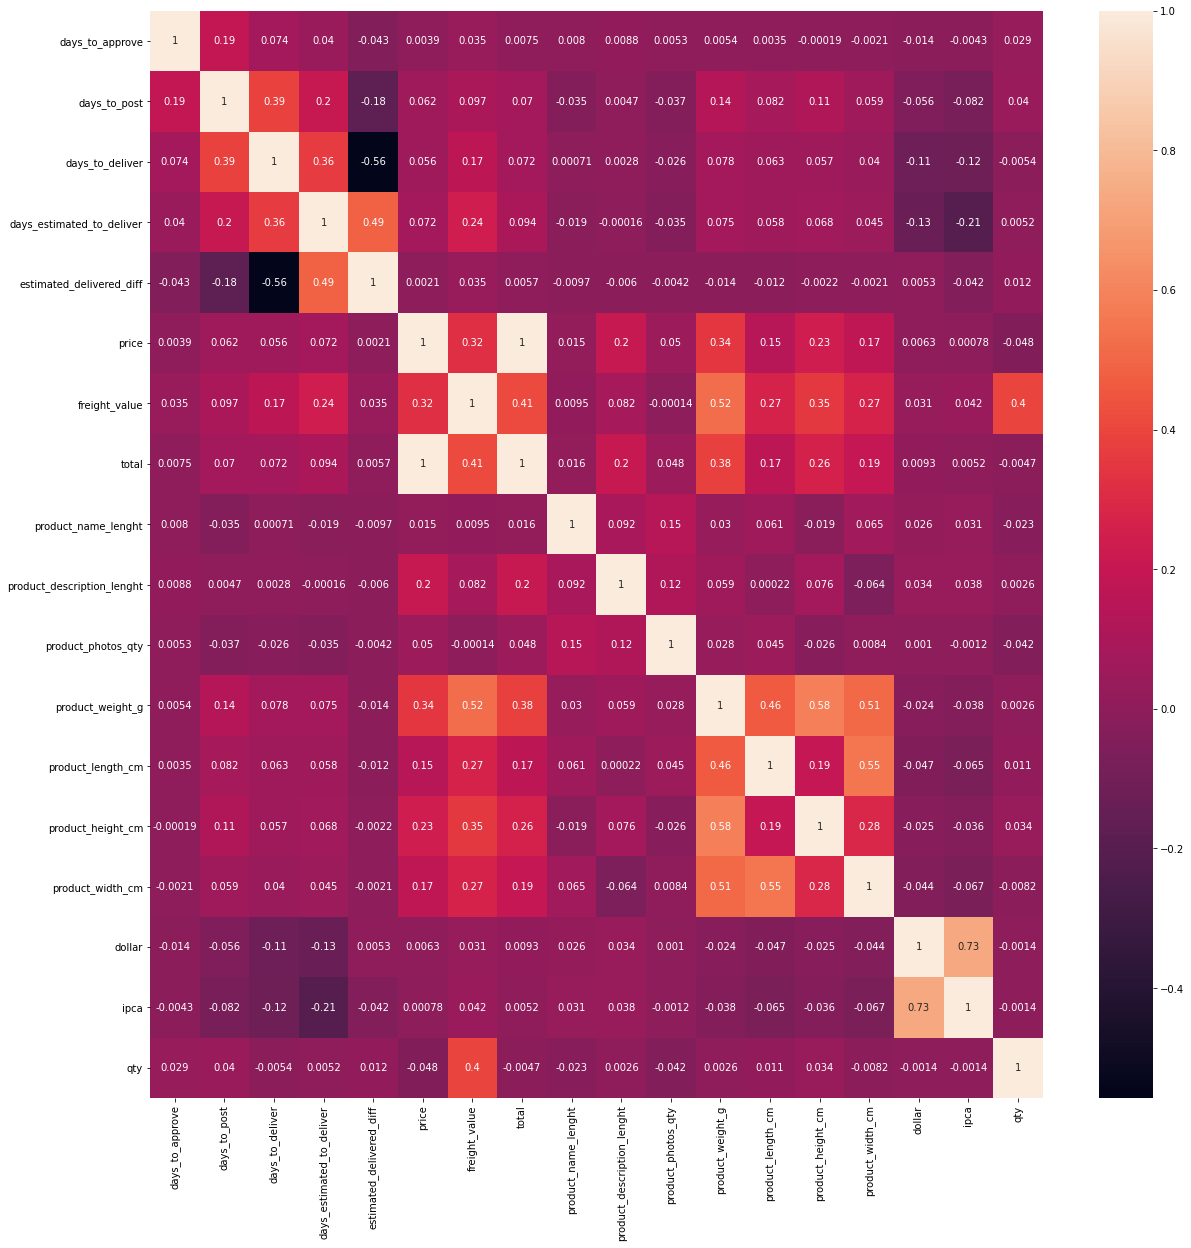

In [4]:

plt.figure(figsize=(20, 20))

value_cols = [
    'days_to_approve',
    'days_to_post',
    'days_to_deliver',
    'days_estimated_to_deliver',
    'estimated_delivered_diff',
    'price',
    'freight_value',
    'total',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'dollar',
    'ipca',
    'qty',
]

corr = sales_df[value_cols].corr()

sns.heatmap(corr, annot=True)


In [5]:
keys = ['seller_id', 'product_id', 'product_category_name']


In [6]:
sales_group = sales_df.groupby(keys)

seller_city_by_group = []
for i, df in sales_group:
    seller_city_by_group.append(list(i) + [
        df['seller_city'].nunique(),
        df['seller_state'].nunique(),
        df['seller_zip_code_prefix'].nunique()])


seller_city_by_group_df = pd.DataFrame(seller_city_by_group, columns=keys+['qty_city', 'qty_state', 'zip_code'])
seller_city_by_group_df.sort_values('zip_code', ascending=False)


,seller_id,product_id,product_category_name,qty_city,qty_state,zip_code
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,eletroportateis,1,1,1
22418,a6bd7d1ccdac48c6b33b28596b7eb122,bbe8590c1225fbb6a477018283da0677,relogios_presentes,1,1,1
22416,a6bd7d1ccdac48c6b33b28596b7eb122,5b1c98d30c986d084d3c312dddf35b74,relogios_presentes,1,1,1
22415,a6bd7d1ccdac48c6b33b28596b7eb122,55b8fd61c5b3198e5801450b75a656e7,relogios_presentes,1,1,1
22414,a6bd7d1ccdac48c6b33b28596b7eb122,52cd5817c291740688bad8a1972bb019,relogios_presentes,1,1,1
...,...,...,...,...,...,...
11198,53e4c6e0f4312d4d2107a8c9cddf45cd,62b1367807a6fccf6e9492860574950e,utilidades_domesticas,1,1,1
11197,53e4c6e0f4312d4d2107a8c9cddf45cd,623eee74e76dce26984376983737af86,moveis_decoracao,1,1,1
11196,53e4c6e0f4312d4d2107a8c9cddf45cd,60c93709754c1b56d6fcc7187a4810f3,utilidades_domesticas,1,1,1
11195,53e4c6e0f4312d4d2107a8c9cddf45cd,5e48cea2e7cec25464ae5de34e700e68,utilidades_domesticas,1,1,1


In [7]:
products_by_seller = sales_df.groupby('seller_id')[['product_id', 'product_category_name']].nunique().sort_values('product_id')
products_by_seller[products_by_seller['product_id'] >= 10]


,product_id,product_category_name
seller_id,,
89a51f50b8095ea78d5768f34c13a76f,10,1
bf3c6d2a28b2b5501e6c15448982dcc9,10,2
fc906263ca5083d09dce42fe02247800,10,3
26e2c91ef821e1ff8985f408788fe35b,10,1
8f54d64f28a993550aa7943f12572959,10,1
...,...,...
7142540dd4c91e2237acb7e911c4eba2,266,2
fa1c13f2614d7b5c4749cbc52fecda94,289,5
d91fb3b7d041e83b64a00a3edfb37e4f,315,6


In [8]:
seller_city_by_group_df[seller_city_by_group_df['qty_city'] > 1]

,seller_id,product_id,product_category_name,qty_city,qty_state,zip_code


In [9]:
def lag_feature(df: pd.DataFrame, col: str, window: int, keys: List[str]):
    for i in range(1, window):
        df[f'{col}_{i}'] = df.groupby(keys)[col].shift(i)
    
    return df


In [10]:
sales_df = lag_feature(sales_df, col='qty', window=30, keys=keys)
sales_df = lag_feature(sales_df, col='dollar', window=30, keys=keys)
sales_df = lag_feature(sales_df, col='ipca', window=30, keys=keys)


<AxesSubplot:>

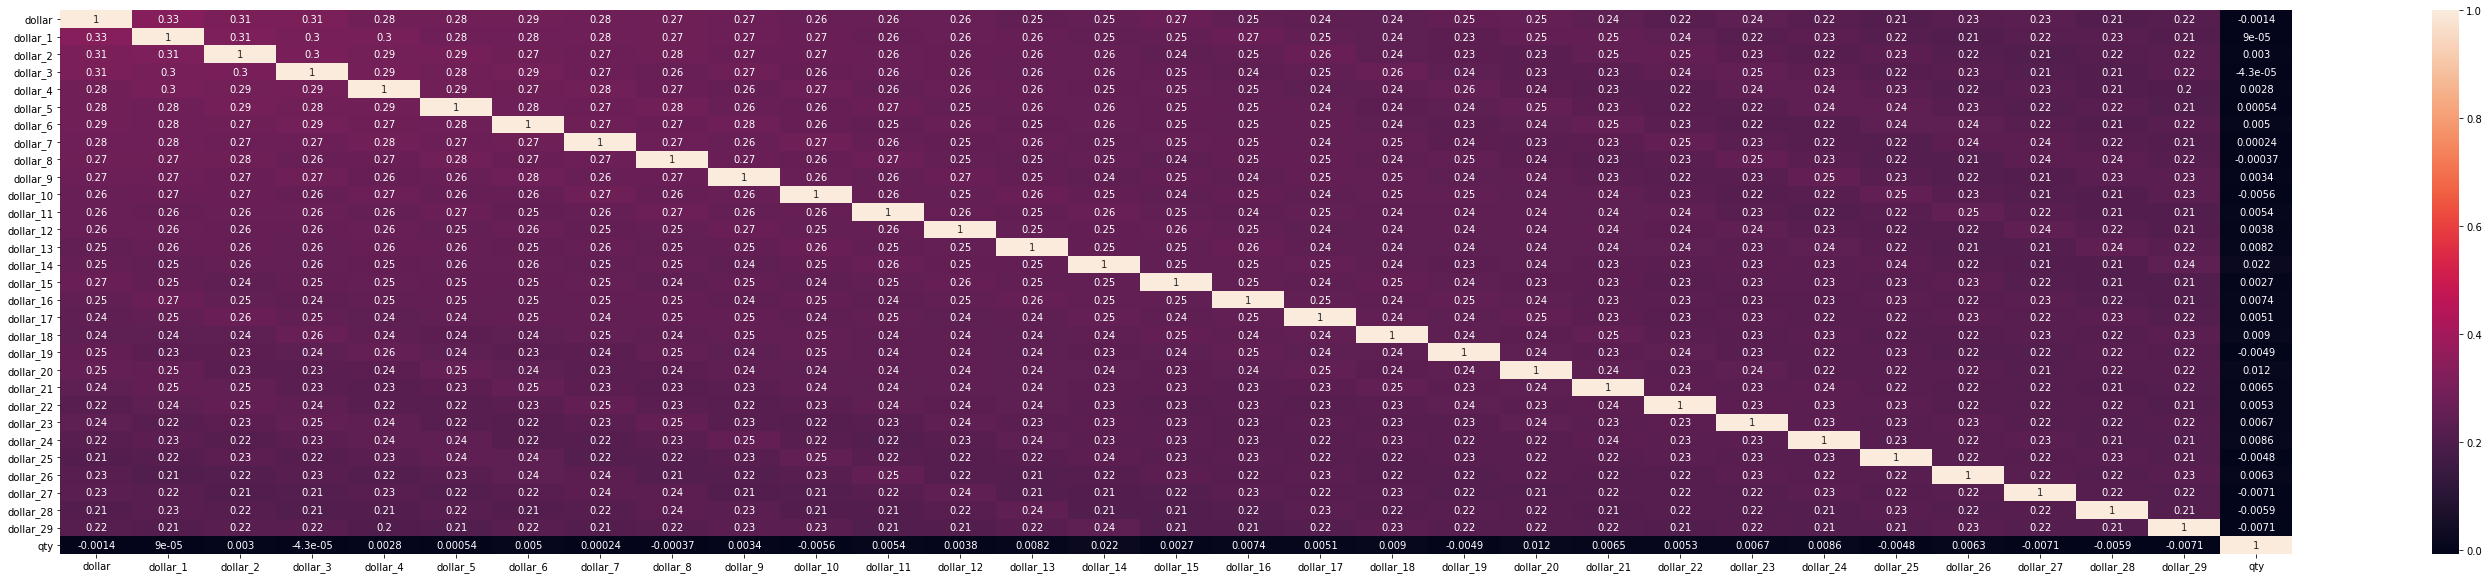

In [11]:
plt.figure(figsize=(50, 10))
corr = sales_df[[c for c in sales_df.columns if c.startswith('dollar')] + ['qty']].corr()

sns.heatmap(corr, annot=True)

<AxesSubplot:>

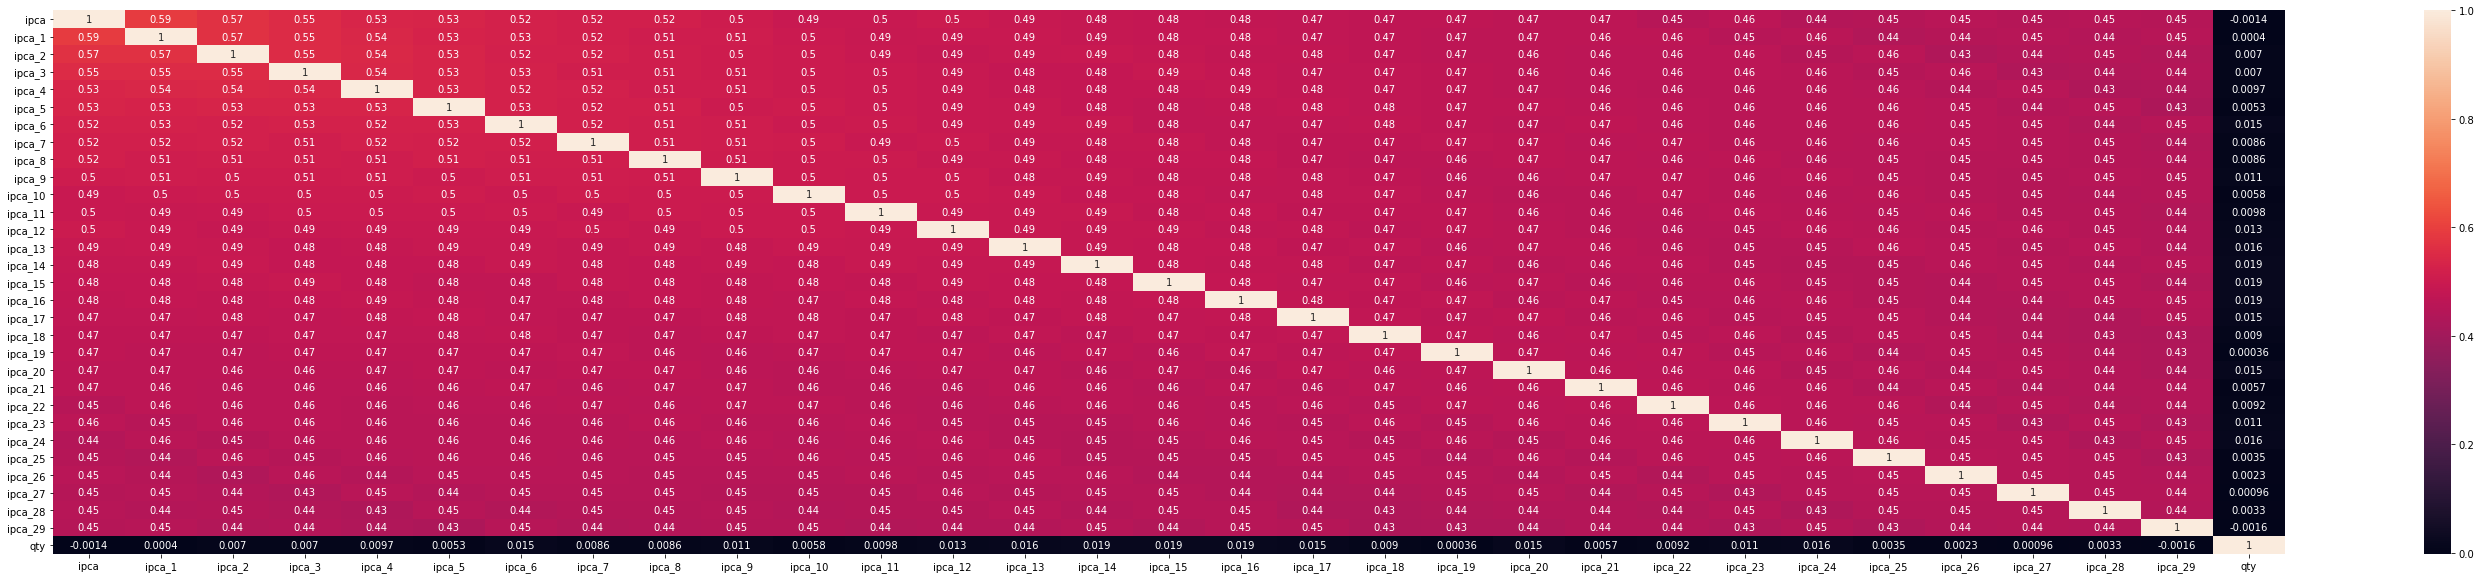

In [12]:
plt.figure(figsize=(50, 10))
corr = sales_df[[c for c in sales_df.columns if c.startswith('ipca')] + ['qty']].corr()

sns.heatmap(corr, annot=True)